In [55]:
#1
!pip install ucimlrepo

In [56]:
#2
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 
  
# metadata 
print(heart_failure_clinical_records.metadata) 
  
# variable information 
print(heart_failure_clinical_records.variables) 


{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'title': 'Machine learning can predict survival of patients with heart failure from serum creatinine and ejec

In [57]:
#3 - Checks for nans
X
binary_columns = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
print(X[binary_columns].isna().any())
#No NaN's exist for non binary categories

creatinine_phosphokinase    False
ejection_fraction           False
platelets                   False
serum_creatinine            False
serum_sodium                False
time                        False
dtype: bool


In [58]:
#View dataset 
X

,death_event
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


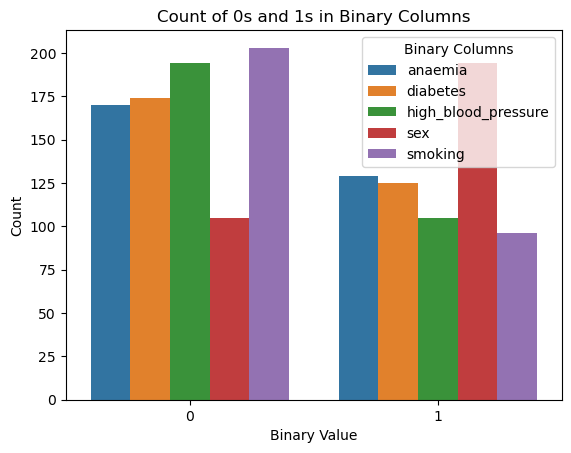

In [59]:
#4a Depicts ratio between classes
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking' ]

# Melt the DataFrame to have a 'variable' and 'value' column
df_melted = X[binary_columns].melt(var_name='Column', value_name='Value')

# Create the countplot
sns.countplot(x='Value', hue='Column', data=df_melted)
plt.xlabel('Binary Value')
plt.ylabel('Count')
plt.title('Count of 0s and 1s in Binary Columns')
plt.legend(title='Binary Columns')
plt.show()

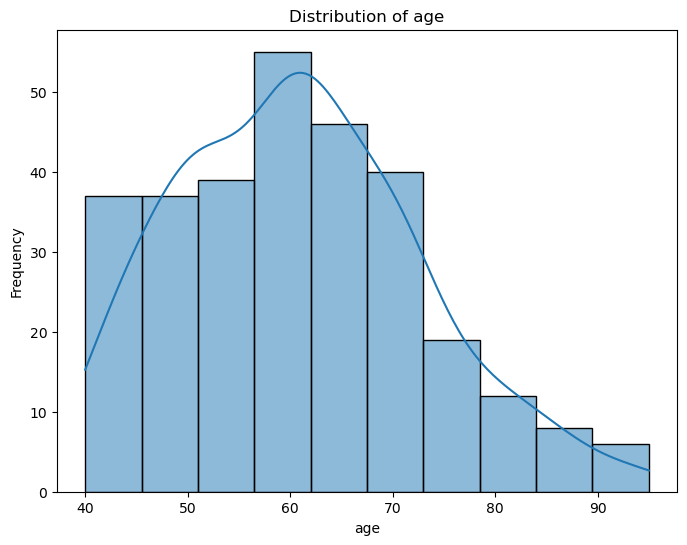

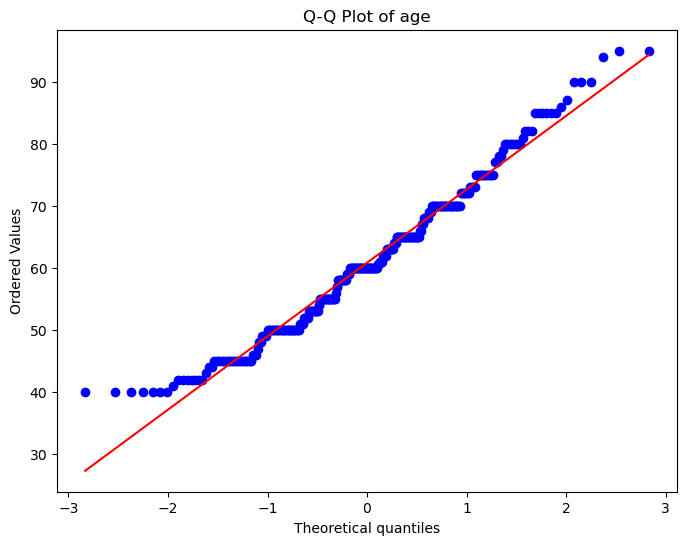

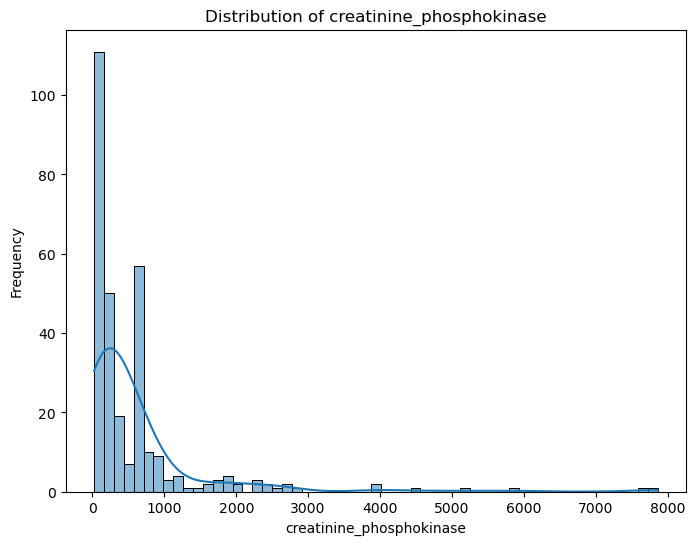

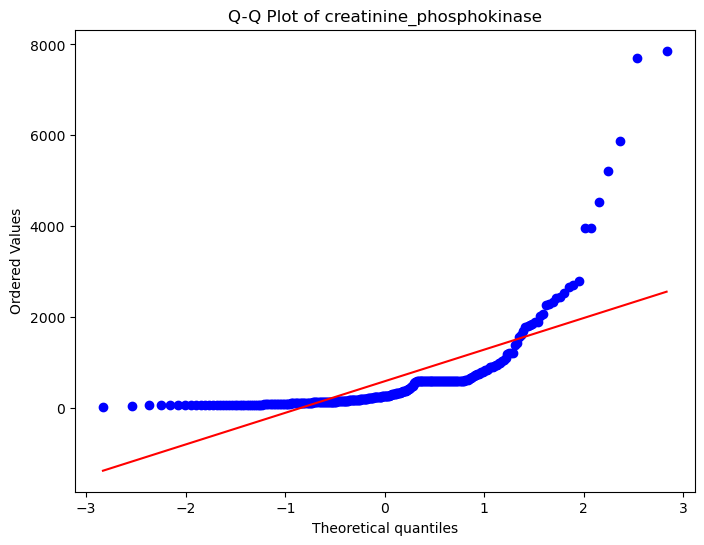

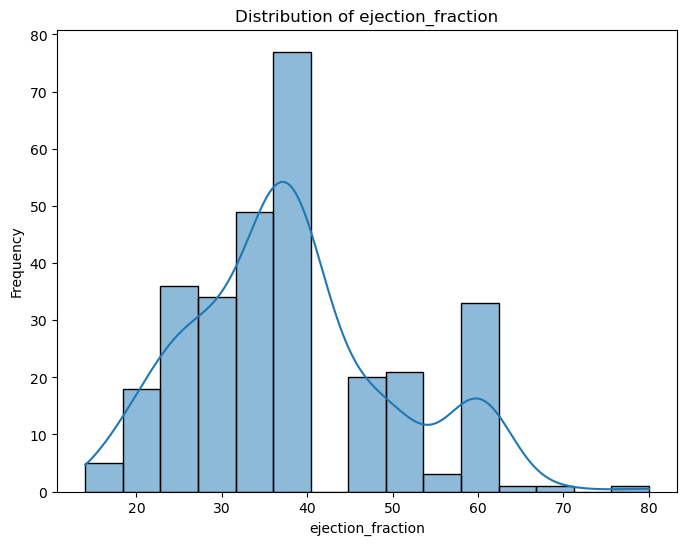

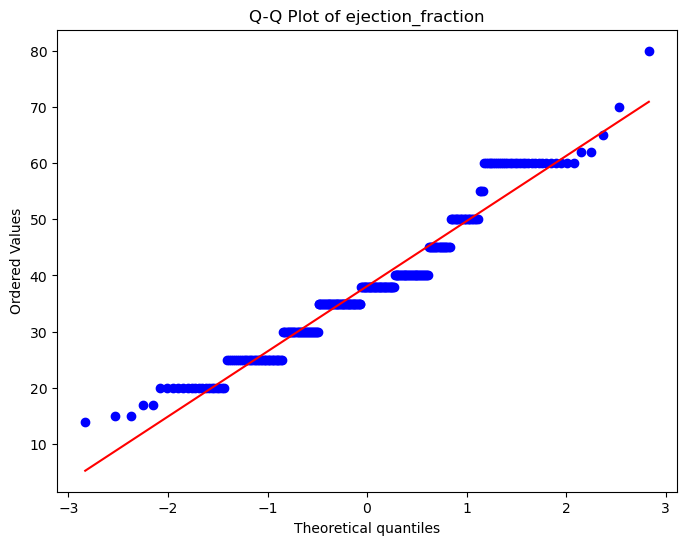

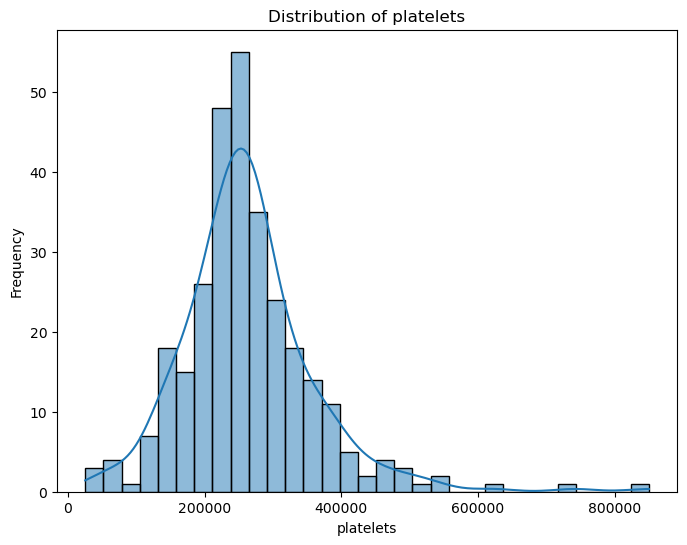

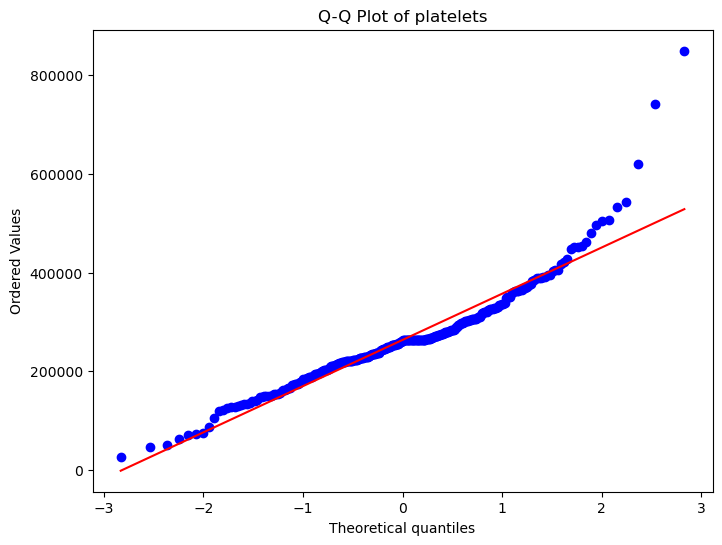

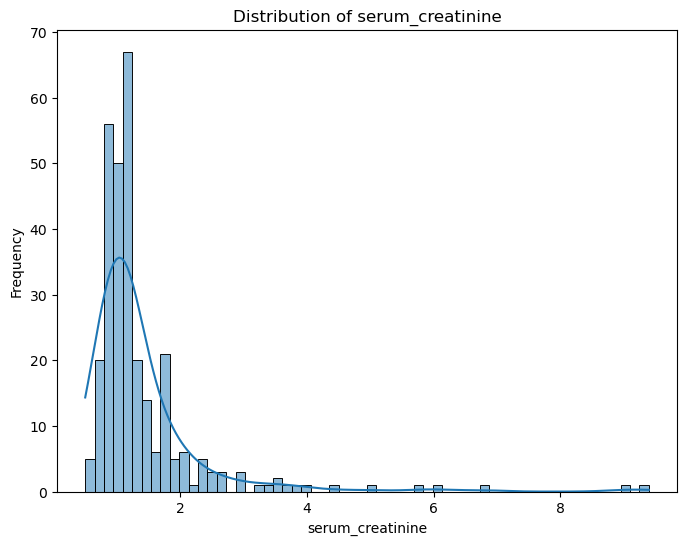

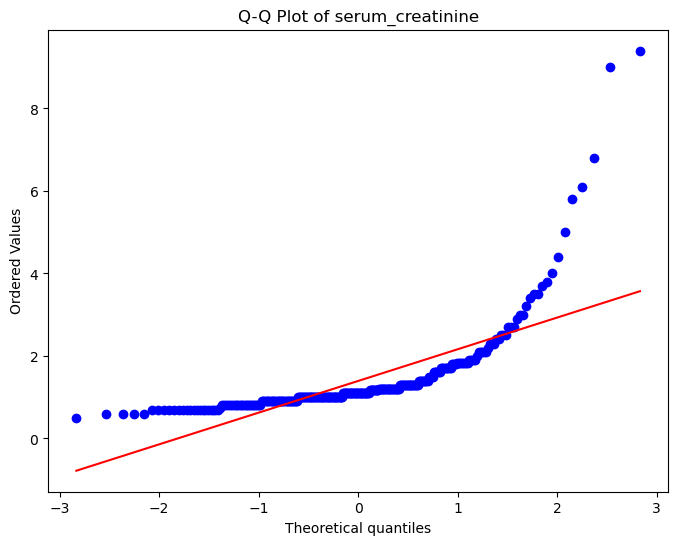

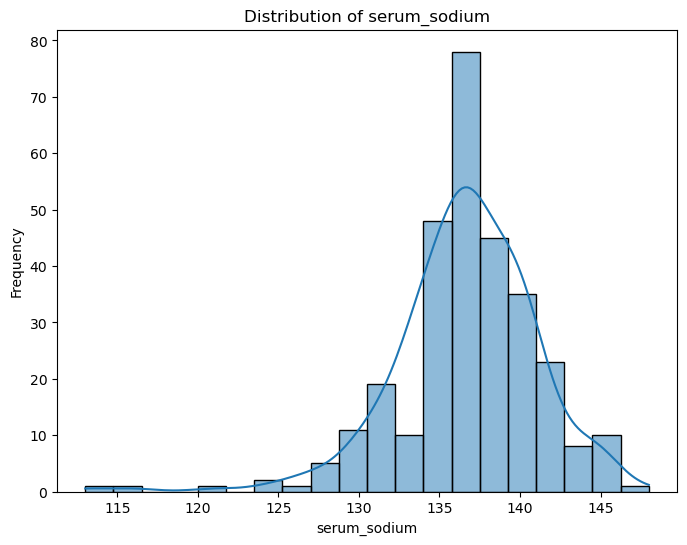

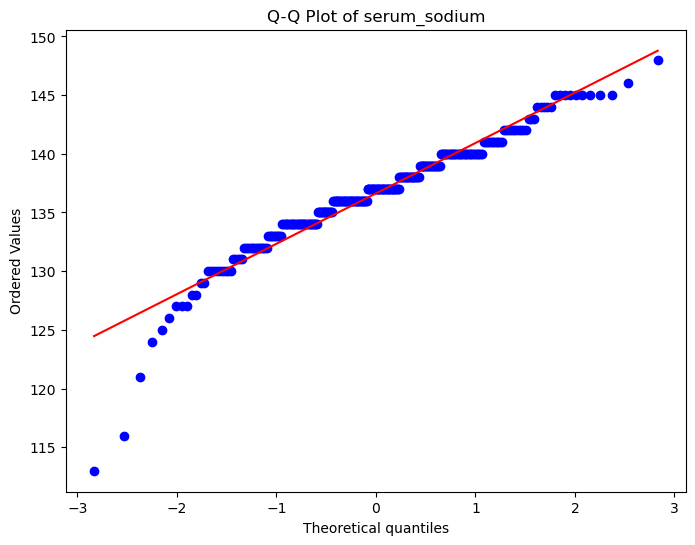

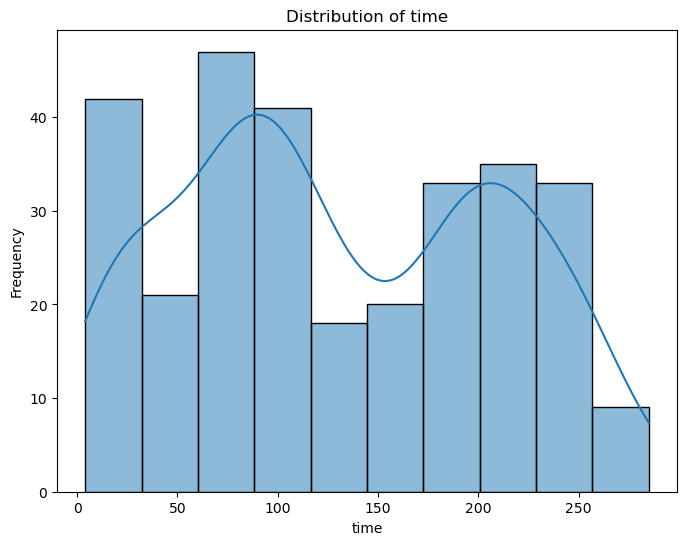

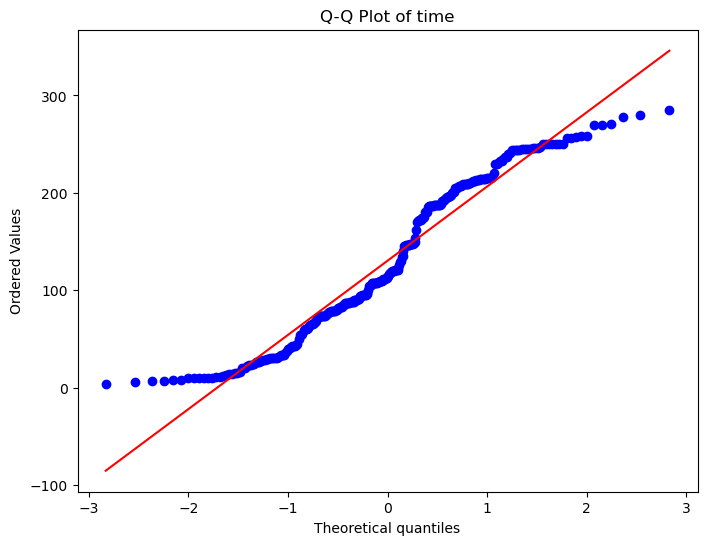

In [62]:
#4b Distribution for non binary classes

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Select non-binary columns (continuous variables)
non_binary_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 
                      'serum_creatinine', 'serum_sodium', 'time']

# Plot histograms and KDEs for each continuous variable
for column in non_binary_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Q-Q Plot
    plt.figure(figsize=(8, 6))
    stats.probplot(X[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()




In [63]:
# 5a Standardization 
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)



In [45]:
#5b Normalization instead of standardization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)


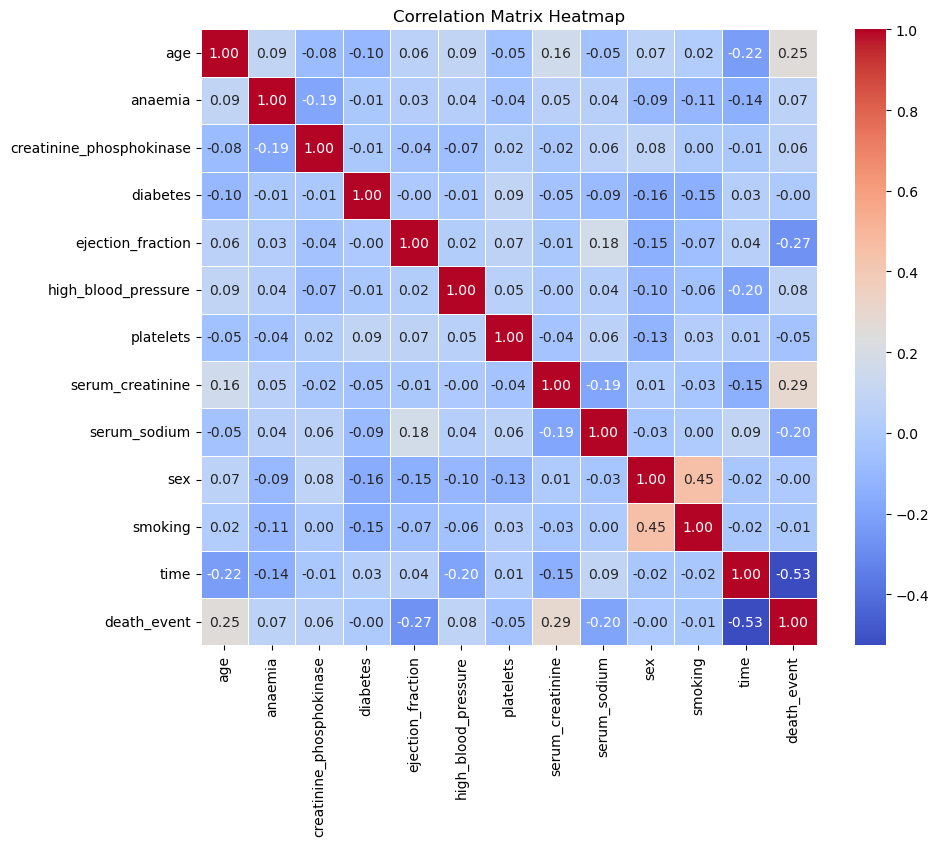

In [64]:
#6 Shows correlation between features and death_event (target variable) by creating a new temp df

#Add y column to X temporarily to see correlation
combined_df = pd.concat([X_standardized, y.reset_index(drop=True)], axis=1)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))


#Correlation Matrix
correlation_matrix = combined_df.corr()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

plt.show()

In [65]:
#7 Key features from coefficient matrix - age, ejection_fraction, serum_creatinine, serum_sodium, time
#X_standardized = X_standardized.drop(columns=['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking'])

#Derived from p statistic (includes serum_sodium)
X_standardized = X_standardized.drop(columns=['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'serum_sodium', 'sex', 'smoking'])
X_standardized.shape

(299, 4)

In [66]:
#8 Split data into 80/20 split
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)



# Display the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (239, 4)
X_test shape: (60, 4)
y_train shape: (239, 1)
y_test shape: (60, 1)


In [67]:
#9 Defining model

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

#default regressor
#sgd_regressor = SGDRegressor(random_state=42)

#tuned regressor
sgd_regressor = SGDRegressor(max_iter=10, tol=1e-3, random_state=42, learning_rate='invscaling', loss='squared_epsilon_insensitive', epsilon=1e-05)






In [68]:
#10 Hyperparameter tuning

search_space = {'max_iter' : [10,100,500,1000,10000],
                'learning_rate' : ['adaptive', 'invscaling', 'optimal', 'constant'],
                'loss' : ['squared_error', 'squared_epsilon_insensitive', 'epsilon_insensitive', 'huber'],
                'epsilon' : [1, .5, .3, .1, .01, .001, .0001, .00001]}

GS=GridSearchCV(estimator=sgd_regressor,
                param_grid = search_space,
                scoring = ['r2', 'neg_root_mean_squared_error'],
                refit='r2',
                cv=5,
                verbose=4
               )

GS.fit(X_train, y_train)
print(GS.best_estimator_)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV 1/5] END epsilon=1, learning_rate=adaptive, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.374) r2: (test=0.432) total time=   0.0s
[CV 2/5] END epsilon=1, learning_rate=adaptive, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.364) r2: (test=0.249) total time=   0.0s
[CV 3/5] END epsilon=1, learning_rate=adaptive, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.302) r2: (test=0.576) total time=   0.0s
[CV 4/5] END epsilon=1, learning_rate=adaptive, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.373) r2: (test=0.294) total time=   0.0s
[CV 5/5] END epsilon=1, learning_rate=adaptive, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.365) r2: (test=0.258) total time=   0.0s
[CV 1/5] END epsilon=1, learning_rate=adaptive, loss=squared_error, max_iter=100; neg_root_mean_squared_error: (test=-0.372) r2: (test=0

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

[CV 3/5] END epsilon=1, learning_rate=adaptive, loss=huber, max_iter=500; neg_root_mean_squared_error: (test=-0.301) r2: (test=0.579) total time=   0.0s
[CV 4/5] END epsilon=1, learning_rate=adaptive, loss=huber, max_iter=500; neg_root_mean_squared_error: (test=-0.372) r2: (test=0.298) total time=   0.0s
[CV 5/5] END epsilon=1, learning_rate=adaptive, loss=huber, max_iter=500; neg_root_mean_squared_error: (test=-0.364) r2: (test=0.261) total time=   0.0s
[CV 1/5] END epsilon=1, learning_rate=adaptive, loss=huber, max_iter=1000; neg_root_mean_squared_error: (test=-0.372) r2: (test=0.438) total time=   0.0s
[CV 2/5] END epsilon=1, learning_rate=adaptive, loss=huber, max_iter=1000; neg_root_mean_squared_error: (test=-0.365) r2: (test=0.245) total time=   0.0s
[CV 3/5] END epsilon=1, learning_rate=adaptive, loss=huber, max_iter=1000; neg_root_mean_squared_error: (test=-0.301) r2: (test=0.579) total time=   0.0s
[CV 4/5] END epsilon=1, learning_rate=adaptive, loss=huber, max_iter=1000; neg_

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 1/5] END epsilon=1, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-11556141988076.547) r2: (test=-542656681238697731101294592.000) total time=   0.0s
[CV 2/5] END epsilon=1, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-8522076789357.781) r2: (test=-411129795134519202539372544.000) total time=   0.0s
[CV 3/5] END epsilon=1, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-10092951920673.699) r2: (test=-474147739801743850911825920.000) total time=   0.0s
[CV 4/5] END epsilon=1, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-12436348827561.061) r2: (test=-783171488040517887265341440.000) total time=   0.0s
[CV 5/5] END epsilon=1, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-25222232008574.574) r2: (test=-3548685912563256320378011648.000) total time=   0.0s
[CV 1

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

[CV 4/5] END epsilon=1, learning_rate=constant, loss=squared_error, max_iter=100; neg_root_mean_squared_error: (test=-0.379) r2: (test=0.271) total time=   0.0s
[CV 5/5] END epsilon=1, learning_rate=constant, loss=squared_error, max_iter=100; neg_root_mean_squared_error: (test=-0.371) r2: (test=0.232) total time=   0.0s
[CV 1/5] END epsilon=1, learning_rate=constant, loss=squared_error, max_iter=500; neg_root_mean_squared_error: (test=-0.381) r2: (test=0.409) total time=   0.0s
[CV 2/5] END epsilon=1, learning_rate=constant, loss=squared_error, max_iter=500; neg_root_mean_squared_error: (test=-0.360) r2: (test=0.265) total time=   0.0s
[CV 3/5] END epsilon=1, learning_rate=constant, loss=squared_error, max_iter=500; neg_root_mean_squared_error: (test=-0.306) r2: (test=0.563) total time=   0.0s
[CV 4/5] END epsilon=1, learning_rate=constant, loss=squared_error, max_iter=500; neg_root_mean_squared_error: (test=-0.379) r2: (test=0.271) total time=   0.0s
[CV 5/5] END epsilon=1, learning_r

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 3/5] END epsilon=0.5, learning_rate=adaptive, loss=squared_error, max_iter=10000; neg_root_mean_squared_error: (test=-0.301) r2: (test=0.579) total time=   0.0s
[CV 4/5] END epsilon=0.5, learning_rate=adaptive, loss=squared_error, max_iter=10000; neg_root_mean_squared_error: (test=-0.372) r2: (test=0.298) total time=   0.0s
[CV 5/5] END epsilon=0.5, learning_rate=adaptive, loss=squared_error, max_iter=10000; neg_root_mean_squared_error: (test=-0.364) r2: (test=0.261) total time=   0.0s
[CV 1/5] END epsilon=0.5, learning_rate=adaptive, loss=squared_epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.434) r2: (test=0.234) total time=   0.0s
[CV 2/5] END epsilon=0.5, learning_rate=adaptive, loss=squared_epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.415) r2: (test=0.027) total time=   0.0s
[CV 3/5] END epsilon=0.5, learning_rate=adaptive, loss=squared_epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.425) r2: (test=0.1

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

[CV 3/5] END epsilon=0.5, learning_rate=invscaling, loss=squared_epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.334) r2: (test=0.482) total time=   0.0s
[CV 4/5] END epsilon=0.5, learning_rate=invscaling, loss=squared_epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.383) r2: (test=0.256) total time=   0.0s
[CV 5/5] END epsilon=0.5, learning_rate=invscaling, loss=squared_epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.361) r2: (test=0.274) total time=   0.0s
[CV 1/5] END epsilon=0.5, learning_rate=invscaling, loss=squared_epsilon_insensitive, max_iter=100; neg_root_mean_squared_error: (test=-0.386) r2: (test=0.396) total time=   0.0s
[CV 2/5] END epsilon=0.5, learning_rate=invscaling, loss=squared_epsilon_insensitive, max_iter=100; neg_root_mean_squared_error: (test=-0.354) r2: (test=0.290) total time=   0.0s
[CV 3/5] END epsilon=0.5, learning_rate=invscaling, loss=squared_epsilon_insensitive, max_iter=100; neg_root

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

[CV 5/5] END epsilon=0.5, learning_rate=optimal, loss=squared_epsilon_insensitive, max_iter=100; neg_root_mean_squared_error: (test=-4340448147011.379) r2: (test=-105092004212676705979990016.000) total time=   0.0s
[CV 1/5] END epsilon=0.5, learning_rate=optimal, loss=squared_epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-927163274444.707) r2: (test=-3493106742771938702131200.000) total time=   0.0s
[CV 2/5] END epsilon=0.5, learning_rate=optimal, loss=squared_epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-3418505476755.500) r2: (test=-66154688000922184054734848.000) total time=   0.0s
[CV 3/5] END epsilon=0.5, learning_rate=optimal, loss=squared_epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-2769653638635.708) r2: (test=-35704931039455498093985792.000) total time=   0.0s
[CV 4/5] END epsilon=0.5, learning_rate=optimal, loss=squared_epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-100661695310

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 5/5] END epsilon=0.5, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.423) r2: (test=0.004) total time=   0.0s
[CV 1/5] END epsilon=0.5, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-0.431) r2: (test=0.246) total time=   0.0s
[CV 2/5] END epsilon=0.5, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-0.411) r2: (test=0.044) total time=   0.0s
[CV 3/5] END epsilon=0.5, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-0.421) r2: (test=0.177) total time=   0.0s
[CV 4/5] END epsilon=0.5, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-0.419) r2: (test=0.109) total time=   0.0s
[CV 5/5] END epsilon=0.5, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=1000; neg_root_mea

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 2/5] END epsilon=0.3, learning_rate=adaptive, loss=epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.371) r2: (test=0.219) total time=   0.0s
[CV 3/5] END epsilon=0.3, learning_rate=adaptive, loss=epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.312) r2: (test=0.547) total time=   0.0s
[CV 4/5] END epsilon=0.3, learning_rate=adaptive, loss=epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.374) r2: (test=0.291) total time=   0.0s
[CV 5/5] END epsilon=0.3, learning_rate=adaptive, loss=epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.369) r2: (test=0.242) total time=   0.0s
[CV 1/5] END epsilon=0.3, learning_rate=adaptive, loss=epsilon_insensitive, max_iter=100; neg_root_mean_squared_error: (test=-0.366) r2: (test=0.455) total time=   0.0s
[CV 2/5] END epsilon=0.3, learning_rate=adaptive, loss=epsilon_insensitive, max_iter=100; neg_root_mean_squared_error: (test=-0.377) r2: (test=0.193) total tim

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END epsilon=0.3, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.378) r2: (test=0.189) total time=   0.0s
[CV 3/5] END epsilon=0.3, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.300) r2: (test=0.581) total time=   0.0s
[CV 4/5] END epsilon=0.3, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.377) r2: (test=0.280) total time=   0.0s
[CV 5/5] END epsilon=0.3, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.369) r2: (test=0.241) total time=   0.0s
[CV 1/5] END epsilon=0.3, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-0.368) r2: (test=0.450) total time=   0.0s
[CV 2/5] END epsilon=0.3, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-0.378) r2: (tes

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 4/5] END epsilon=0.3, learning_rate=optimal, loss=epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-1.990) r2: (test=-19.057) total time=   0.0s
[CV 5/5] END epsilon=0.3, learning_rate=optimal, loss=epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-1.975) r2: (test=-20.750) total time=   0.0s
[CV 1/5] END epsilon=0.3, learning_rate=optimal, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-1.704) r2: (test=-10.794) total time=   0.0s
[CV 2/5] END epsilon=0.3, learning_rate=optimal, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-1.636) r2: (test=-14.150) total time=   0.0s
[CV 3/5] END epsilon=0.3, learning_rate=optimal, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-1.785) r2: (test=-13.830) total time=   0.0s
[CV 4/5] END epsilon=0.3, learning_rate=optimal, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-1.990) r2: (test=-19.

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 5/5] END epsilon=0.3, learning_rate=constant, loss=epsilon_insensitive, max_iter=10000; neg_root_mean_squared_error: (test=-0.380) r2: (test=0.193) total time=   0.0s
[CV 1/5] END epsilon=0.3, learning_rate=constant, loss=huber, max_iter=10; neg_root_mean_squared_error: (test=-0.396) r2: (test=0.362) total time=   0.0s
[CV 2/5] END epsilon=0.3, learning_rate=constant, loss=huber, max_iter=10; neg_root_mean_squared_error: (test=-0.364) r2: (test=0.249) total time=   0.0s
[CV 3/5] END epsilon=0.3, learning_rate=constant, loss=huber, max_iter=10; neg_root_mean_squared_error: (test=-0.301) r2: (test=0.579) total time=   0.0s
[CV 4/5] END epsilon=0.3, learning_rate=constant, loss=huber, max_iter=10; neg_root_mean_squared_error: (test=-0.364) r2: (test=0.328) total time=   0.0s
[CV 5/5] END epsilon=0.3, learning_rate=constant, loss=huber, max_iter=10; neg_root_mean_squared_error: (test=-0.366) r2: (test=0.252) total time=   0.0s
[CV 1/5] END epsilon=0.3, learning_rate=constant, loss=hube

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 4/5] END epsilon=0.1, learning_rate=adaptive, loss=huber, max_iter=100; neg_root_mean_squared_error: (test=-0.379) r2: (test=0.273) total time=   0.0s
[CV 5/5] END epsilon=0.1, learning_rate=adaptive, loss=huber, max_iter=100; neg_root_mean_squared_error: (test=-0.365) r2: (test=0.259) total time=   0.0s
[CV 1/5] END epsilon=0.1, learning_rate=adaptive, loss=huber, max_iter=500; neg_root_mean_squared_error: (test=-0.521) r2: (test=-0.105) total time=   0.0s
[CV 2/5] END epsilon=0.1, learning_rate=adaptive, loss=huber, max_iter=500; neg_root_mean_squared_error: (test=-0.368) r2: (test=0.235) total time=   0.0s
[CV 3/5] END epsilon=0.1, learning_rate=adaptive, loss=huber, max_iter=500; neg_root_mean_squared_error: (test=-0.398) r2: (test=0.262) total time=   0.0s
[CV 4/5] END epsilon=0.1, learning_rate=adaptive, loss=huber, max_iter=500; neg_root_mean_squared_error: (test=-0.379) r2: (test=0.273) total time=   0.0s
[CV 5/5] END epsilon=0.1, learning_rate=adaptive, loss=huber, max_ite

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 3/5] END epsilon=0.1, learning_rate=invscaling, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.497) r2: (test=-0.148) total time=   0.0s
[CV 4/5] END epsilon=0.1, learning_rate=invscaling, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.471) r2: (test=-0.125) total time=   0.0s
[CV 5/5] END epsilon=0.1, learning_rate=invscaling, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.429) r2: (test=-0.027) total time=   0.0s
[CV 1/5] END epsilon=0.1, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-11556141988076.547) r2: (test=-542656681238697731101294592.000) total time=   0.0s
[CV 2/5] END epsilon=0.1, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-8522076789357.781) r2: (test=-411129795134519202539372544.000) total time=   0.0s
[CV 3/5] END epsilon=0.1, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-1

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

[CV 4/5] END epsilon=0.1, learning_rate=optimal, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.594) r2: (test=-0.789) total time=   0.0s
[CV 5/5] END epsilon=0.1, learning_rate=optimal, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.804) r2: (test=-2.606) total time=   0.0s
[CV 1/5] END epsilon=0.1, learning_rate=constant, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.381) r2: (test=0.409) total time=   0.0s
[CV 2/5] END epsilon=0.1, learning_rate=constant, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.360) r2: (test=0.265) total time=   0.0s
[CV 3/5] END epsilon=0.1, learning_rate=constant, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.306) r2: (test=0.563) total time=   0.0s
[CV 4/5] END epsilon=0.1, learning_rate=constant, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.379) r2: (test=0.271) total time=   0.0s
[CV 5/5] END epsilon=0.1, learning_rat

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 5/5] END epsilon=0.01, learning_rate=adaptive, loss=squared_error, max_iter=500; neg_root_mean_squared_error: (test=-0.364) r2: (test=0.261) total time=   0.0s
[CV 1/5] END epsilon=0.01, learning_rate=adaptive, loss=squared_error, max_iter=1000; neg_root_mean_squared_error: (test=-0.372) r2: (test=0.438) total time=   0.0s
[CV 2/5] END epsilon=0.01, learning_rate=adaptive, loss=squared_error, max_iter=1000; neg_root_mean_squared_error: (test=-0.365) r2: (test=0.245) total time=   0.0s
[CV 3/5] END epsilon=0.01, learning_rate=adaptive, loss=squared_error, max_iter=1000; neg_root_mean_squared_error: (test=-0.301) r2: (test=0.579) total time=   0.0s
[CV 4/5] END epsilon=0.01, learning_rate=adaptive, loss=squared_error, max_iter=1000; neg_root_mean_squared_error: (test=-0.372) r2: (test=0.298) total time=   0.0s
[CV 5/5] END epsilon=0.01, learning_rate=adaptive, loss=squared_error, max_iter=1000; neg_root_mean_squared_error: (test=-0.364) r2: (test=0.261) total time=   0.0s
[CV 1/5] EN

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 3/5] END epsilon=0.01, learning_rate=invscaling, loss=squared_error, max_iter=10000; neg_root_mean_squared_error: (test=-0.303) r2: (test=0.573) total time=   0.0s
[CV 4/5] END epsilon=0.01, learning_rate=invscaling, loss=squared_error, max_iter=10000; neg_root_mean_squared_error: (test=-0.371) r2: (test=0.304) total time=   0.0s
[CV 5/5] END epsilon=0.01, learning_rate=invscaling, loss=squared_error, max_iter=10000; neg_root_mean_squared_error: (test=-0.362) r2: (test=0.271) total time=   0.0s
[CV 1/5] END epsilon=0.01, learning_rate=invscaling, loss=squared_epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.371) r2: (test=0.441) total time=   0.0s
[CV 2/5] END epsilon=0.01, learning_rate=invscaling, loss=squared_epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.365) r2: (test=0.246) total time=   0.0s
[CV 3/5] END epsilon=0.01, learning_rate=invscaling, loss=squared_epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 1/5] END epsilon=0.01, learning_rate=invscaling, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.655) r2: (test=-0.743) total time=   0.1s
[CV 2/5] END epsilon=0.01, learning_rate=invscaling, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.473) r2: (test=-0.268) total time=   0.0s
[CV 3/5] END epsilon=0.01, learning_rate=invscaling, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.553) r2: (test=-0.422) total time=   0.0s
[CV 4/5] END epsilon=0.01, learning_rate=invscaling, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.515) r2: (test=-0.344) total time=   0.0s
[CV 5/5] END epsilon=0.01, learning_rate=invscaling, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.478) r2: (test=-0.274) total time=   0.0s
[CV 1/5] END epsilon=0.01, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-11556141988076.547) r2: (test=-542656681238697731101294592.000) total time= 

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 1/5] END epsilon=0.01, learning_rate=optimal, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.504) r2: (test=-0.034) total time=   0.0s
[CV 2/5] END epsilon=0.01, learning_rate=optimal, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.416) r2: (test=0.019) total time=   0.0s
[CV 3/5] END epsilon=0.01, learning_rate=optimal, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.419) r2: (test=0.183) total time=   0.0s
[CV 4/5] END epsilon=0.01, learning_rate=optimal, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.360) r2: (test=0.344) total time=   0.0s
[CV 5/5] END epsilon=0.01, learning_rate=optimal, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.540) r2: (test=-0.624) total time=   0.0s
[CV 1/5] END epsilon=0.01, learning_rate=constant, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.381) r2: (test=0.409) total time=   0.0s
[CV 2/5] END epsilon=0.01, learning_rate=constant,

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 2/5] END epsilon=0.001, learning_rate=adaptive, loss=squared_error, max_iter=500; neg_root_mean_squared_error: (test=-0.365) r2: (test=0.245) total time=   0.0s
[CV 3/5] END epsilon=0.001, learning_rate=adaptive, loss=squared_error, max_iter=500; neg_root_mean_squared_error: (test=-0.301) r2: (test=0.579) total time=   0.0s
[CV 4/5] END epsilon=0.001, learning_rate=adaptive, loss=squared_error, max_iter=500; neg_root_mean_squared_error: (test=-0.372) r2: (test=0.298) total time=   0.0s
[CV 5/5] END epsilon=0.001, learning_rate=adaptive, loss=squared_error, max_iter=500; neg_root_mean_squared_error: (test=-0.364) r2: (test=0.261) total time=   0.0s
[CV 1/5] END epsilon=0.001, learning_rate=adaptive, loss=squared_error, max_iter=1000; neg_root_mean_squared_error: (test=-0.372) r2: (test=0.438) total time=   0.0s
[CV 2/5] END epsilon=0.001, learning_rate=adaptive, loss=squared_error, max_iter=1000; neg_root_mean_squared_error: (test=-0.365) r2: (test=0.245) total time=   0.0s
[CV 3/5]

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 4/5] END epsilon=0.001, learning_rate=invscaling, loss=squared_error, max_iter=1000; neg_root_mean_squared_error: (test=-0.371) r2: (test=0.304) total time=   0.0s
[CV 5/5] END epsilon=0.001, learning_rate=invscaling, loss=squared_error, max_iter=1000; neg_root_mean_squared_error: (test=-0.362) r2: (test=0.271) total time=   0.0s
[CV 1/5] END epsilon=0.001, learning_rate=invscaling, loss=squared_error, max_iter=10000; neg_root_mean_squared_error: (test=-0.375) r2: (test=0.429) total time=   0.0s
[CV 2/5] END epsilon=0.001, learning_rate=invscaling, loss=squared_error, max_iter=10000; neg_root_mean_squared_error: (test=-0.364) r2: (test=0.250) total time=   0.0s
[CV 3/5] END epsilon=0.001, learning_rate=invscaling, loss=squared_error, max_iter=10000; neg_root_mean_squared_error: (test=-0.303) r2: (test=0.573) total time=   0.0s
[CV 4/5] END epsilon=0.001, learning_rate=invscaling, loss=squared_error, max_iter=10000; neg_root_mean_squared_error: (test=-0.371) r2: (test=0.304) total t

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 4/5] END epsilon=0.001, learning_rate=optimal, loss=squared_epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-18017456737700.211) r2: (test=-1643834359928453837969424384.000) total time=   0.0s
[CV 5/5] END epsilon=0.001, learning_rate=optimal, loss=squared_epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-26241621264477.074) r2: (test=-3841332107761251753243181056.000) total time=   0.0s
[CV 1/5] END epsilon=0.001, learning_rate=optimal, loss=squared_epsilon_insensitive, max_iter=100; neg_root_mean_squared_error: (test=-1946852212039.597) r2: (test=-15401583890381087239569408.000) total time=   0.0s
[CV 2/5] END epsilon=0.001, learning_rate=optimal, loss=squared_epsilon_insensitive, max_iter=100; neg_root_mean_squared_error: (test=-1506596893555.049) r2: (test=-12849380825648755468402688.000) total time=   0.0s
[CV 3/5] END epsilon=0.001, learning_rate=optimal, loss=squared_epsilon_insensitive, max_iter=100; neg_root_mean_squared_error: (tes

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

[CV 1/5] END epsilon=0.001, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.364) r2: (test=0.462) total time=   0.0s
[CV 2/5] END epsilon=0.001, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.368) r2: (test=0.235) total time=   0.0s
[CV 3/5] END epsilon=0.001, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.307) r2: (test=0.561) total time=   0.0s
[CV 4/5] END epsilon=0.001, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.362) r2: (test=0.338) total time=   0.0s
[CV 5/5] END epsilon=0.001, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.384) r2: (test=0.179) total time=   0.0s
[CV 1/5] END epsilon=0.001, learning_rate=constant, loss=squared_epsilon_insensitive, max_iter=1000; neg_

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 4/5] END epsilon=0.0001, learning_rate=adaptive, loss=squared_epsilon_insensitive, max_iter=10000; neg_root_mean_squared_error: (test=-0.372) r2: (test=0.298) total time=   0.0s
[CV 5/5] END epsilon=0.0001, learning_rate=adaptive, loss=squared_epsilon_insensitive, max_iter=10000; neg_root_mean_squared_error: (test=-0.364) r2: (test=0.261) total time=   0.0s
[CV 1/5] END epsilon=0.0001, learning_rate=adaptive, loss=epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.502) r2: (test=-0.023) total time=   0.0s
[CV 2/5] END epsilon=0.0001, learning_rate=adaptive, loss=epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.375) r2: (test=0.202) total time=   0.0s
[CV 3/5] END epsilon=0.0001, learning_rate=adaptive, loss=epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (test=-0.344) r2: (test=0.449) total time=   0.0s
[CV 4/5] END epsilon=0.0001, learning_rate=adaptive, loss=epsilon_insensitive, max_iter=10; neg_root_mean_squared_error: (

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END epsilon=0.0001, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.539) r2: (test=-0.180) total time=   0.0s
[CV 2/5] END epsilon=0.0001, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.359) r2: (test=0.271) total time=   0.0s
[CV 3/5] END epsilon=0.0001, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.387) r2: (test=0.303) total time=   0.0s
[CV 4/5] END epsilon=0.0001, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.360) r2: (test=0.342) total time=   0.0s
[CV 5/5] END epsilon=0.0001, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=500; neg_root_mean_squared_error: (test=-0.365) r2: (test=0.256) total time=   0.0s
[CV 1/5] END epsilon=0.0001, learning_rate=invscaling, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (tes

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 1/5] END epsilon=0.0001, learning_rate=optimal, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-0.947) r2: (test=-2.642) total time=   0.0s
[CV 2/5] END epsilon=0.0001, learning_rate=optimal, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-1.774) r2: (test=-16.815) total time=   0.0s
[CV 3/5] END epsilon=0.0001, learning_rate=optimal, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-2.219) r2: (test=-21.914) total time=   0.0s
[CV 4/5] END epsilon=0.0001, learning_rate=optimal, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-2.156) r2: (test=-22.533) total time=   0.0s
[CV 5/5] END epsilon=0.0001, learning_rate=optimal, loss=epsilon_insensitive, max_iter=1000; neg_root_mean_squared_error: (test=-2.059) r2: (test=-22.639) total time=   0.0s
[CV 1/5] END epsilon=0.0001, learning_rate=optimal, loss=epsilon_insensitive, max_iter=10000; neg_root_mean_squared_error: (test=-0

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 5/5] END epsilon=0.0001, learning_rate=constant, loss=huber, max_iter=10; neg_root_mean_squared_error: (test=-0.484) r2: (test=-0.305) total time=   0.0s
[CV 1/5] END epsilon=0.0001, learning_rate=constant, loss=huber, max_iter=100; neg_root_mean_squared_error: (test=-0.661) r2: (test=-0.777) total time=   0.0s
[CV 2/5] END epsilon=0.0001, learning_rate=constant, loss=huber, max_iter=100; neg_root_mean_squared_error: (test=-0.479) r2: (test=-0.296) total time=   0.0s
[CV 3/5] END epsilon=0.0001, learning_rate=constant, loss=huber, max_iter=100; neg_root_mean_squared_error: (test=-0.559) r2: (test=-0.454) total time=   0.0s
[CV 4/5] END epsilon=0.0001, learning_rate=constant, loss=huber, max_iter=100; neg_root_mean_squared_error: (test=-0.520) r2: (test=-0.371) total time=   0.0s
[CV 5/5] END epsilon=0.0001, learning_rate=constant, loss=huber, max_iter=100; neg_root_mean_squared_error: (test=-0.484) r2: (test=-0.305) total time=   0.0s
[CV 1/5] END epsilon=0.0001, learning_rate=cons

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 3/5] END epsilon=1e-05, learning_rate=adaptive, loss=huber, max_iter=500; neg_root_mean_squared_error: (test=-0.559) r2: (test=-0.454) total time=   0.0s
[CV 4/5] END epsilon=1e-05, learning_rate=adaptive, loss=huber, max_iter=500; neg_root_mean_squared_error: (test=-0.520) r2: (test=-0.371) total time=   0.0s
[CV 5/5] END epsilon=1e-05, learning_rate=adaptive, loss=huber, max_iter=500; neg_root_mean_squared_error: (test=-0.484) r2: (test=-0.305) total time=   0.0s
[CV 1/5] END epsilon=1e-05, learning_rate=adaptive, loss=huber, max_iter=1000; neg_root_mean_squared_error: (test=-0.661) r2: (test=-0.778) total time=   0.0s
[CV 2/5] END epsilon=1e-05, learning_rate=adaptive, loss=huber, max_iter=1000; neg_root_mean_squared_error: (test=-0.479) r2: (test=-0.297) total time=   0.0s
[CV 3/5] END epsilon=1e-05, learning_rate=adaptive, loss=huber, max_iter=1000; neg_root_mean_squared_error: (test=-0.559) r2: (test=-0.454) total time=   0.0s
[CV 4/5] END epsilon=1e-05, learning_rate=adaptiv

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

[CV 1/5] END epsilon=1e-05, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-11556141988076.547) r2: (test=-542656681238697731101294592.000) total time=   0.0s
[CV 2/5] END epsilon=1e-05, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-8522076789357.781) r2: (test=-411129795134519202539372544.000) total time=   0.0s
[CV 3/5] END epsilon=1e-05, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-10092951920673.699) r2: (test=-474147739801743850911825920.000) total time=   0.0s
[CV 4/5] END epsilon=1e-05, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-12436348827561.061) r2: (test=-783171488040517887265341440.000) total time=   0.0s
[CV 5/5] END epsilon=1e-05, learning_rate=optimal, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-25222232008574.574) r2: (test=-3548685912563256320378011648.000) tota

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END epsilon=1e-05, learning_rate=optimal, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.515) r2: (test=-0.345) total time=   0.0s
[CV 5/5] END epsilon=1e-05, learning_rate=optimal, loss=huber, max_iter=10000; neg_root_mean_squared_error: (test=-0.478) r2: (test=-0.275) total time=   0.0s
[CV 1/5] END epsilon=1e-05, learning_rate=constant, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.381) r2: (test=0.409) total time=   0.0s
[CV 2/5] END epsilon=1e-05, learning_rate=constant, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.360) r2: (test=0.265) total time=   0.0s
[CV 3/5] END epsilon=1e-05, learning_rate=constant, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.306) r2: (test=0.563) total time=   0.0s
[CV 4/5] END epsilon=1e-05, learning_rate=constant, loss=squared_error, max_iter=10; neg_root_mean_squared_error: (test=-0.379) r2: (test=0.271) total time=   0.0s
[CV 5/5] END epsilon=1e-05

/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [69]:
print(GS.best_params_)

{'epsilon': 1e-05, 'learning_rate': 'invscaling', 'loss': 'squared_epsilon_insensitive', 'max_iter': 10}


In [70]:
#11 Metrics

# Fit the model on the training data
sgd_regressor.fit(X_train, y_train)

# Predict using the test data
y_pred = sgd_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 0.1797881601265514
R-squared: 0.260300141193617
Mean Absolute Error: 0.34811004886807967


/Users/rahulc/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
#12 OLS training, fitting, and report
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the OLS model
model = sm.OLS(y_train, X_train_const).fit()

# Print the model summary
print(model.summary())

# Make predictions on the test set
y_pred = model.predict(X_test_const)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")


                            OLS Regression Results                            
Dep. Variable:            death_event   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     44.14
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           1.40e-27
Time:                        22:25:27   Log-Likelihood:                -84.776
No. Observations:                 239   AIC:                             179.6
Df Residuals:                     234   BIC:                             196.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3035      0.02